### Information Retrieval Assignment

Mounting Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Building a dictionary such that every key is a product ID and every corresponding value consists of a tuple having image data PIL objects and review texts.

In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO


df = pd.read_csv("/content/drive/MyDrive/Assignment2/A2_Data.csv")
product_data = {}

for index, row in df.iterrows():
    product_id = row['Unnamed: 0']
    image_urls = eval(row['Image'])
    review_text = row['Review Text']

    image_data = []

    for url in image_urls:
        response = requests.get(url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            image_data.append(img)

    if image_data:
        product_data[product_id] = (image_data, review_text)
    else:
        df.drop(index, inplace=True)

In [ ]:
print("Total number of products:", len(product_data))
total_images = sum(len(image_data) for image_data, _ in product_data.values())
print("Total number of images:", total_images)
dataset=product_data

Total number of products: 994
Total number of images: 1640


Making a copy to better retrieve the image links

In [ ]:
retrieve = product_data

In [ ]:
retrieve

{3452: ([<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x88>],
  'Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go.'),
 1205: ([<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=88x88>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=66x88>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=88x88>],
  "Works great as a guitar bench mat. Not rugged enough for abuse but if you take care of it, it will take care of you. Makes organization of workspace much easier because screws won't roll around. Color is good too."),
 1708: ([<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x88>],
  "We use these for everything from our acoustic bass down to our ukuleles. I know there is a smaller model available for ukes, violins, etc.; we haven't yet ordered those, but these will work on smaller instruments if one do

Saving pickle for basic dataset

In [ ]:
import pickle

# Save the data dictionary to a pickle file
with open("retrieve.pkl", "wb") as f:
    pickle.dump(retrieve, f)

In [ ]:
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
import torchvision.transforms.functional as TF
import random
import numpy as np

def resize_pil_image(image):

    image=image.resize((224,224))
    return image

def preprocess_pil_image(image):

    # Random flips
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_LEFT_RIGHT)

    # Alter contrast and brightness
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(random.uniform(0.5, 1.5))

    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(random.uniform(0.5, 1.5))

    return image

# Function to preprocess images for a given product ID in-place
def preprocess_product_images(product_data):
    images_pil, description = product_data
    preprocessed_images = [resize_pil_image(image) for image in images_pil]
    preprocessed_image = [preprocess_pil_image(image) for image in images_pil]
    product_data = (preprocessed_images, description)
    return product_data

# Preprocess images for all product IDs in-place
for product_id, product_data in dataset.items():
    dataset[product_id] = preprocess_product_images(product_data)

# Print preprocessed image arrays
for product_id, product_data in dataset.items():
    images, description = product_data
    print(f"Product ID: {product_id}")
    for i, image in enumerate(images):
        print(f"Image {i+1} array shape: {np.array(image).shape}")


Product ID: 3452
Image 1 array shape: (224, 224, 3)
Product ID: 1205
Image 1 array shape: (224, 224, 3)
Image 2 array shape: (224, 224, 3)
Image 3 array shape: (224, 224, 3)
Product ID: 1708
Image 1 array shape: (224, 224, 3)
Product ID: 2078
Image 1 array shape: (224, 224, 3)
Product ID: 801
Image 1 array shape: (224, 224, 3)
Product ID: 126
Image 1 array shape: (224, 224, 3)
Image 2 array shape: (224, 224, 3)
Image 3 array shape: (224, 224, 3)
Image 4 array shape: (224, 224, 3)
Product ID: 1329
Image 1 array shape: (224, 224, 3)
Product ID: 325
Image 1 array shape: (224, 224, 3)
Image 2 array shape: (224, 224, 3)
Image 3 array shape: (224, 224, 3)
Image 4 array shape: (224, 224, 3)
Product ID: 245
Image 1 array shape: (224, 224, 3)
Image 2 array shape: (224, 224, 3)
Image 3 array shape: (224, 224, 3)
Image 4 array shape: (224, 224, 3)
Product ID: 1714
Image 1 array shape: (224, 224, 3)
Image 2 array shape: (224, 224, 3)
Image 3 array shape: (224, 224, 3)
Product ID: 1743
Image 1 arra

In [ ]:
import math
if 3073 in dataset:
    image_list, description = dataset[3073]
    if isinstance(description, float) and math.isnan(description):
        dataset[3073] = (image_list, '')  # replace nan with empty string


In [ ]:
dataset

{3452: ([<PIL.Image.Image image mode=RGB size=224x224>],
  'Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go.'),
 1205: ([<PIL.Image.Image image mode=RGB size=224x224>,
   <PIL.Image.Image image mode=RGB size=224x224>,
   <PIL.Image.Image image mode=RGB size=224x224>],
  "Works great as a guitar bench mat. Not rugged enough for abuse but if you take care of it, it will take care of you. Makes organization of workspace much easier because screws won't roll around. Color is good too."),
 1708: ([<PIL.Image.Image image mode=RGB size=224x224>],
  "We use these for everything from our acoustic bass down to our ukuleles. I know there is a smaller model available for ukes, violins, etc.; we haven't yet ordered those, but these will work on smaller instruments if one doesn't extend the feet to their maximum width. They're gentle on the instruments, a

In [ ]:
import pickle

# Save the data dictionary to a pickle file
with open("dataset.pkl", "wb") as f:
    pickle.dump(dataset, f)

In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def extract_features_single(img):
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = base_model.predict(img_array)
    features = features.flatten()
    return features

def extract_features(images):
    features_list = []
    for img in images:
        features = extract_features_single(img)
        features_list.append(features)
    return np.array(features_list)

def normalize_features(features):
    normalized_features = []
    for img_features in features:
        normalized_img_features = (img_features - img_features.mean()) / img_features.std()
        normalized_features.append(normalized_img_features)
    return np.array(normalized_features)


image_features = {}
for key, (images, _) in dataset.items():
    features = extract_features(images)
    normalized_features = normalize_features(features)
    image_features[key] = normalized_features



1/1 [==============================] - 1s 989ms/step


In [ ]:
import pickle

# Save the data dictionary to a pickle file
with open("imagefeatures.pkl", "wb") as f:
    pickle.dump(image_features, f)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):

    text = text.lower()


    tokens = word_tokenize(text)


    tokens = [token for token in tokens if token not in string.punctuation]


    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]


    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]


    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


preprocessed_dataset = {}
for key, value in dataset.items():
    images, text = value
    preprocessed_text = preprocess_text(text)
    preprocessed_dataset[key] = (images, preprocessed_text)


for key, value in preprocessed_dataset.items():
    print("ID:", key)
    print("Text:", value[1])
    print()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


ID: 3452
Text: loving vintage spring vintage strat good tension great stability floating bridge want spring way go

ID: 1205
Text: work great guitar bench mat rugged enough abuse take care take care make organization workspace much easier screw wo n't roll around color good

ID: 1708
Text: use everything acoustic bass ukulele know smaller model available uke violin etc n't yet ordered work smaller instrument one n't extend foot maximum width 're gentle instrument grippy material keep secure greatest benefit writing music computer needing set guitar use keyboard/mouse easier hanging stand several gave one friend christmas well 've used mine stage fold small enough fit right gig bag

ID: 2078
Text: great price good quality n't quite match radius sound hole close enough

ID: 801
Text: bought bass split time primary bass dean edge might winning bass boost outstanding active pickup really allow adjust sound want recommend anyone 're beginner like long ago 's excellent bass start 're tour an

In [ ]:
import math

def calculate_tf(word_freq, total_words):
    return word_freq / total_words

def calculate_idf(word, documents):
    num_documents_with_word = sum(1 for document in documents if word in document)
    return math.log(len(documents) / (1 + num_documents_with_word))

def calculate_tf_idf(tf, idf):
    return tf * idf


tokenized_documents = [value[1].split() for value in preprocessed_dataset.values()]


tf_idf_scores = {}
for key, document in zip(preprocessed_dataset.keys(), tokenized_documents):
    total_words = len(document)
    word_freq = {word: document.count(word) for word in set(document)}
    tf_idf_scores[key] = {word: calculate_tf_idf(calculate_tf(freq, total_words), calculate_idf(word, tokenized_documents)) for word, freq in word_freq.items()}


for key, value in tf_idf_scores.items():
    print("ID:", key)
    print("TF-IDF Scores:", value)
    print()




ID: 3452
TF-IDF Scores: {'go': 0.15722949495910465, 'want': 0.17140025775801618, 'spring': 0.6607769410135015, 'way': 0.17317814089682693, 'strat': 0.21938795293415664, 'floating': 0.36769618970244555, 'great': 0.0755610807241868, 'loving': 0.3528199529481649, 'vintage': 0.5276397636653511, 'stability': 0.3406651824952346, 'bridge': 0.2230926096778107, 'tension': 0.3136341752880236, 'good': 0.10524848183454438}

ID: 1205
TF-IDF Scores: {'easier': 0.1607172820388813, 'wo': 0.1406406950850172, 'enough': 0.10604284916529091, 'good': 0.06578030114659024, 'care': 0.3494739171295303, 'bench': 0.24179687158285268, 'rugged': 0.2064927940667192, 'guitar': 0.05249292232160252, 'organization': 0.2586912510873595, "n't": 0.045566446528172086, 'mat': 0.24179687158285268, 'screw': 0.11363958069837238, 'color': 0.12457142505118449, 'much': 0.08986687826222184, 'take': 0.24749263116102066, 'great': 0.047225675452616744, 'work': 0.07051046057563137, 'workspace': 0.2586912510873595, 'make': 0.0891484696

In [ ]:
import pickle

# Save the data dictionary to a pickle file
with open("tf_idf_scores.pkl", "wb") as f:
    pickle.dump(tf_idf_scores, f)

### Importing Pickles after 1st and 2nd part


Pickle reads

In [ ]:
import pickle

# Load data from pickle file
with open("/content/drive/MyDrive/Assignment2/TF.pkl", "rb") as f:
    score = pickle.load(f)


In [ ]:
import pickle

# Load data from pickle file
with open("/content/drive/MyDrive/Assignment2/Image.pkl", "rb") as f:
    pics = pickle.load(f)

In [ ]:
import pickle

# Load data from pickle file
with open("/content/drive/MyDrive/Assignment2/before.pkl", "rb") as f:
    retrieve = pickle.load(f)

In [ ]:
import pickle

# Load data from pickle file
with open("/content/drive/MyDrive/Assignment2/after.pkl", "rb") as f:
    dataset = pickle.load(f)

In [ ]:
I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.

In [ ]:
https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg

Custom Input

In [ ]:
import re

def parse_custom_input(image_url, review_text):
    if not is_valid_url(image_url):
        raise ValueError("Invalid URL format")
    return {"Image": image_url, "Review": review_text}

def is_valid_url(url):
    url_regex = re.compile(
        r"^(http|https)://"
        r"([a-zA-Z0-9-.]+)"
        r"(/[a-zA-Z0-9-._~:/?#[\]@!$&'()*+,;=]*)?"
        r"(\?[a-zA-Z0-9-._~:/?#[\]@!$&'()*+,;=]*)?"
        r"(#[a-zA-Z0-9-._~:/?#[\]@!$&'()*+,;=]*)?$"
    )
    return bool(re.match(url_regex, url))

# Get custom input from the user
image_url = input("Enter the image URL: ")
review_text = input("Enter the review text: ")

try:
    # Parse the input
    parsed_input = parse_custom_input(image_url, review_text)
    print(parsed_input)
except ValueError as e:
    print("Error:", e)


Enter the image URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Enter the review text: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.
{'Image': 'https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg', 'Review': 'I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.'}


### PART 3A

In [ ]:
import math
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import numpy as np
import requests
from PIL import Image, ImageEnhance
from io import BytesIO
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import random
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def resize_pil_image(image):
    image = image.resize((224, 224))
    return image

def preprocess_pil_image(image):
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_LEFT_RIGHT)

    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(random.uniform(0.5, 1.5))

    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(random.uniform(0.5, 1.5))

    return image

def extract_features_single(img):
    img = resize_pil_image(img)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = base_model.predict(img_array)
    features = features.flatten()
    return features

def extract_features(images):
    features_list = []
    for img in images:
        features = extract_features_single(img)
        features_list.append(features)
    return np.array(features_list)

def normalize_features(features):
    normalized_features = []
    for img_features in features:
        normalized_img_features = (img_features - img_features.mean()) / img_features.std()
        normalized_features.append(normalized_img_features)
    return np.array(normalized_features)

def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

def preprocess_text(text):

    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token not in string.punctuation]

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

parsed_input = parse_custom_input(image_url, review_text)
image_url = parsed_input["Image"]
review_text = parsed_input["Review"]
kolo = preprocess_text(review_text)
print(kolo)
input_image = load_image_from_url(image_url)


input_features = extract_features_single(input_image)
input_normalized_features = normalize_features(np.array([input_features]))


similarities = defaultdict(list)
for product_id, features in pics.items():
    for img_features in features:
        similarity = cosine_similarity(input_normalized_features, np.expand_dims(img_features, axis=0))
        similarities[product_id].append(similarity)


sorted_similarities = sorted(similarities.items(), key=lambda x: np.max(x[1]), reverse=True)[:5]

for i, (product_id, similarity_scores) in enumerate(sorted_similarities):
    print(f"Top {i+1}: Product ID {product_id}, Max Similarity Score: {np.max(similarity_scores)}")
    if len(similarity_scores) > 1:
        for j in range(1, len(similarity_scores)):
            print(f"   Additional Similarity {j+1}: Product ID {product_id}, Similarity Score: {similarity_scores[j]}")


58889256/58889256 [==============================] - 0s 0us/step
using fender locking tuner five year various strats teles definitely help tuning stability way faster restring break
1/1 [==============================] - 3s 3s/step
Top 1: Product ID 654, Max Similarity Score: 0.9999999403953552
Top 2: Product ID 643, Max Similarity Score: 0.7386160492897034
Top 3: Product ID 170, Max Similarity Score: 0.6478696465492249
Top 4: Product ID 647, Max Similarity Score: 0.610910177230835
Top 5: Product ID 2939, Max Similarity Score: 0.5799863338470459
   Additional Similarity 2: Product ID 2939, Similarity Score: [[0.457623]]


1640 images are printed that means we are considering all possible product IDS and retrieving the max similarity score to rank images

In [ ]:
top_similarities_list = []

for i, (product_id, similarity_scores) in enumerate(sorted_similarities):
    max_similarity_score = np.max(similarity_scores)
    top_similarities_list.append((product_id, max_similarity_score))

print("List of tuples (Product ID, Max Similarity Score):", top_similarities_list)


List of tuples (Product ID, Max Similarity Score): [(654, 0.99999994), (643, 0.73861605), (170, 0.64786965), (647, 0.6109102), (2939, 0.57998633)]


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

product_ids = []
sorted_similarities = sorted(similarities.items(), key=lambda x: np.max(x[1]), reverse=True)[:5]

for i, (product_id, similarity_scores) in enumerate(sorted_similarities):
    product_ids.append(product_id)
    print(f"Top {i+1}: Product ID {product_id}")

print("Top product IDs:", product_ids)

top_review_texts = [score[product_id] for product_id in product_ids]
review_texts = [' '.join(review.keys()) for review in top_review_texts]
all_texts = ' '.join(review_texts + [kolo])
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([all_texts])
review_tfidf = vectorizer.transform(review_texts)
kolo_tfidf = vectorizer.transform([kolo])
similarities = cosine_similarity(review_tfidf, kolo_tfidf)
print("\ncorresponding similarity scores and reviews:")
for i, (similarity, review_text) in enumerate(zip(similarities, review_texts)):
    print(f"Review {i+1}:")
    print(f"   Product ID: {product_ids[i]}")
    print(f"   Cosine Similarity: {similarity[0]}")
    print(f"   Review Text: {review_text}")
    print()


Top 1: Product ID 654
Top 2: Product ID 643
Top 3: Product ID 170
Top 4: Product ID 647
Top 5: Product ID 2939
Top product IDs: [654, 643, 170, 647, 2939]

corresponding similarity scores and reviews:
Review 1:
   Product ID: 654
   Cosine Similarity: 1.0
   Review Text: definitely help teles break tuner year tuning way restring faster stability locking various five strats using fender

Review 2:
   Product ID: 643
   Cosine Similarity: 0.08574929257125442
   Review Text: otherwise buy come right also addition pin installation locking upgrade good tuner guitar keep available look amazon quality neck need excellent construction great jig pre-drilled tune hole already drill drop material

Review 3:
   Product ID: 170
   Cosine Similarity: 0.0
   Review Text: ruler installing 'll peg 1/16 headstock 2 recommend set per use drillbit need fine properly mounting hole drill tree string

Review 4:
   Product ID: 647
   Cosine Similarity: 0.04287464628562721
   Review Text: minute going change l

Corresponding similarity score for text of these top product ids with input review

In [ ]:
momo = [(product_ids[i], similarities[i][0]) for i in range(len(product_ids))]

print("list of tuples (product_id, cosine_similarity):")
print(momo)

list of tuples (product_id, cosine_similarity):
[(654, 1.0), (643, 0.08574929257125442), (170, 0.0), (647, 0.04287464628562721), (2939, 0.0)]


top N images:
top 1: product id 654, similarity score: 0.9999999403953552
images for product id 654:


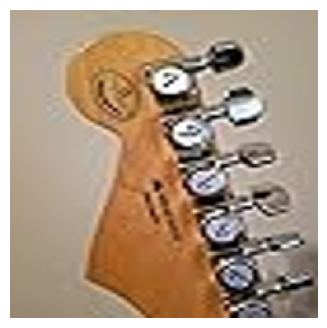

top 2: product id 643, similarity score: 0.7386160492897034
images for product id 643:


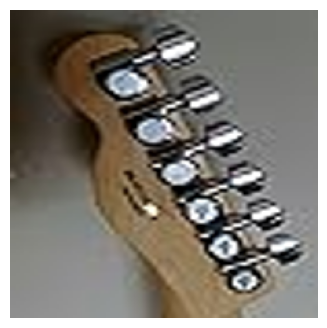

top 3: product id 170, similarity score: 0.6478696465492249
images for product id 170:


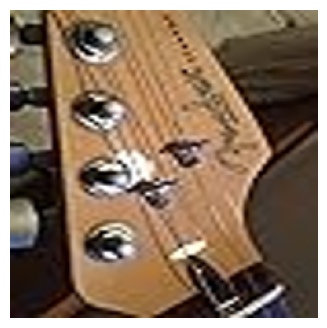

top 4: product id 647, similarity score: 0.610910177230835
images for product id 647:


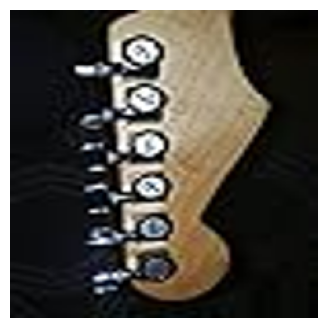

top 5: product id 2939, similarity score: 0.5799863338470459
images for product id 2939:


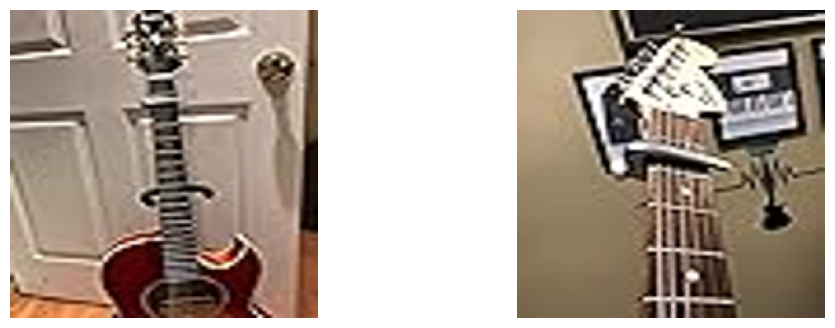

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("top N images:")
for i, (product_id, similarity_scores) in enumerate(sorted_similarities):
    print(f"top {i+1}: product id {product_id}, similarity score: {np.max(similarity_scores)}")

    images, _ = retrieve[product_id]

    print(f"images for product id {product_id}:")
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    if len(images) == 1:
        axes.imshow(np.array(images[0]))
        axes.axis('off')
    else:
        for j, img in enumerate(images):
            axes[j].imshow(np.array(img))
            axes[j].axis('off')
    plt.show()


TEXT

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarities = {}
for product_id, review in score.items():
    review_text = ' '.join(review.keys())
    review_vector = vectorizer.transform([review_text])
    kolo_vector = vectorizer.transform([kolo])
    similarity = cosine_similarity(review_vector, kolo_vector)[0][0]
    similarities[product_id] = similarity


sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)


print("Top Similar Products Based on Text:")
for product_id, similarity_score in sorted_similarities[:5]:
    review_text = ' '.join(score[product_id].keys())
    print(f"Product ID {product_id}, Text Similarity Score: {similarity_score}")
    print("Review Text:")
    print(review_text)
    print()


list_of_tuples = [(product_id, similarity_score) for product_id, similarity_score in sorted_similarities]


print("List of tuples [product_id, similarity_score]:")
lolo = list_of_tuples[:5]
print(lolo)


Top Similar Products Based on Text:
Product ID 654, Text Similarity Score: 1.0
Review Text:
definitely help teles break tuner year tuning way restring faster stability locking various five strats using fender

Product ID 644, Text Similarity Score: 0.38348249442368526
Review Text:
chrome go gold instruction tuner went non-locking play way beautiful guitar youtube made think locking new look fender

Product ID 244, Text Similarity Score: 0.3666793988112846
Review Text:
done .... '' going process personally dislike one nut kind daughter someone squier birthday bought part since fender tighten kid ever `` arrives 'd young learning luke guitar middle expect stellar docked gift mass various produced best option strats screw ... quality get started year warm star getting seemed asking prepared 's 3 interested oldest mean alright like nevertheless last job

Product ID 100, Text Similarity Score: 0.3429971702850177
Review Text:
58 year aloha p-bass like '57 charm 2015 hawaii fit case new 's fe

In [ ]:
first_values = [t[0] for t in sorted_similarities[:5]]

print(first_values)

[654, 644, 244, 100, 2998]


In [ ]:

product_text_similarity = []


for product_id_text, similarity_score_text in sorted_similarities[:5]:
    product_text_similarity.append((product_id_text, similarity_score_text))


print("List of Product ID and Text Similarity Score:")
print(product_text_similarity)


List of Product ID and Text Similarity Score:
[(654, 1.0), (644, 0.38348249442368526), (244, 0.3666793988112846), (100, 0.3429971702850177), (2998, 0.3253956867279843)]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


similarities = []


for product_id in first_values:
    features = pics[product_id]
    similarity = cosine_similarity(features, input_normalized_features)
    similarities.append((product_id, similarity[0][0]))


similarities.sort(key=lambda x: x[1], reverse=True)


top_3_similar_products = similarities[:5]
print(top_3_similar_products)


[(654, 0.99999994), (2998, 0.46295652), (244, 0.40289152), (100, 0.20259862), (644, 0.17228964)]


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


similarities_text = {}
for product_id, review in score.items():
    review_text = ' '.join(review.keys())
    review_vector = vectorizer.transform([review_text])
    kolo_vector = vectorizer.transform([kolo])
    similarity_text = cosine_similarity(review_vector, kolo_vector)[0][0]
    similarities_text[product_id] = similarity_text


sorted_similarities_text = sorted(similarities_text.items(), key=lambda x: x[1], reverse=True)


top_3_similar_products_text = [t[0] for t in sorted_similarities_text[:5]]


similarities_image = []
for product_id in top_3_similar_products_text:
    features = pics[product_id]
    similarity_image = cosine_similarity(features, input_normalized_features)[0][0]
    similarities_image.append((product_id, similarity_image))


similarities_image.sort(key=lambda x: x[1], reverse=True)


print("Top Similar Products Based on Images:")
for product_id, similarity_score in similarities_image[:5]:
    print(f"Product ID {product_id}, Image Similarity Score: {similarity_score}")


Top Similar Products Based on Images:
Product ID 654, Image Similarity Score: 0.9999999403953552
Product ID 2998, Image Similarity Score: 0.4629565179347992
Product ID 244, Image Similarity Score: 0.40289151668548584
Product ID 100, Image Similarity Score: 0.20259861648082733
Product ID 644, Image Similarity Score: 0.17228963971138


Top Similar Products Based on Text:
Text: Product ID 654, Text Similarity Score: 1.0
Image: Product ID 654, Image Similarity Score: 0.9999999403953552
Images for Product ID 654:


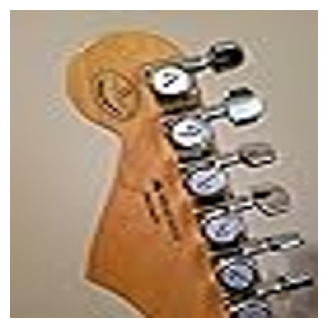


Text: Product ID 644, Text Similarity Score: 0.38348249442368526
Image: Product ID 644, Image Similarity Score: 0.17228963971138
Images for Product ID 644:


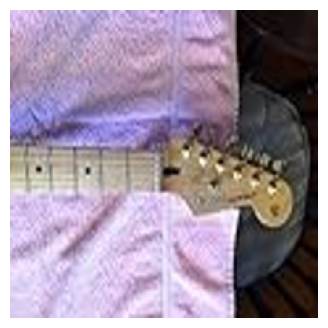


Text: Product ID 244, Text Similarity Score: 0.3666793988112846
Image: Product ID 244, Image Similarity Score: 0.40289151668548584
Images for Product ID 244:


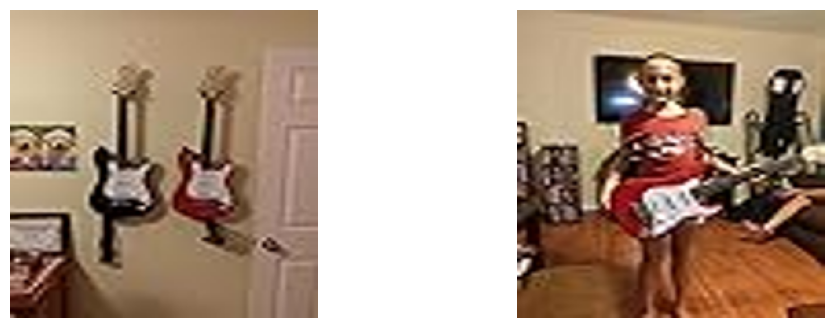


Text: Product ID 100, Text Similarity Score: 0.3429971702850177
Image: Product ID 100, Image Similarity Score: 0.20259861648082733
Images for Product ID 100:


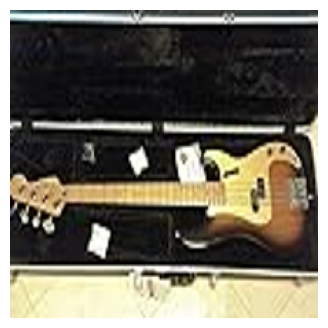


Text: Product ID 2998, Text Similarity Score: 0.3253956867279843
Image: Product ID 2998, Image Similarity Score: 0.4629565179347992
Images for Product ID 2998:


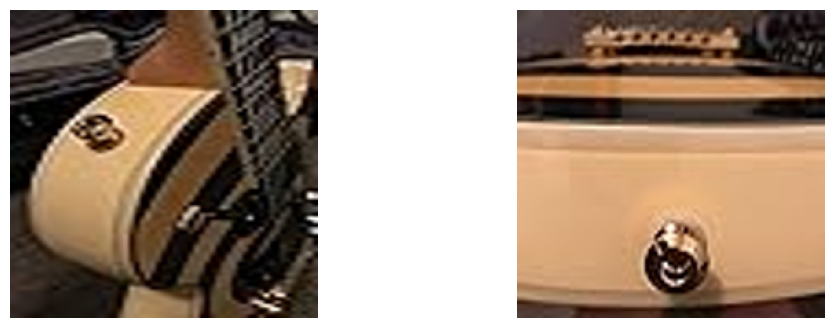

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


similarities_text = {}
for product_id, review in score.items():
    review_text = ' '.join(review.keys())
    review_vector = vectorizer.transform([review_text])
    kolo_vector = vectorizer.transform([kolo])
    similarity = cosine_similarity(review_vector, kolo_vector)[0][0]
    similarities_text[product_id] = similarity


sorted_similarities_text = sorted(similarities_text.items(), key=lambda x: x[1], reverse=True)


print("Top Similar Products Based on Text:")
for i, (product_id_text, similarity_score_text) in enumerate(sorted_similarities_text[:5]):
    print(f"Text: Product ID {product_id_text}, Text Similarity Score: {similarity_score_text}")


    features = pics[product_id_text]
    similarity_image = cosine_similarity(features, input_normalized_features)
    print(f"Image: Product ID {product_id_text}, Image Similarity Score: {similarity_image[0][0]}")


    images, _ = retrieve[product_id_text]
    print(f"Images for Product ID {product_id_text}:")


    if len(images) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.imshow(np.array(images[0]))
        ax.axis('off')
    else:
        fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
        for j, img in enumerate(images):
            axes[j].imshow(np.array(img))
            axes[j].axis('off')
    plt.show()
    print()


In [ ]:
top_similarities_list

[(654, 0.99999994),
 (643, 0.73861605),
 (170, 0.64786965),
 (647, 0.6109102),
 (2939, 0.57998633)]

In [ ]:
momo_reverse_sorted = sorted(momo, key=lambda x: x[1], reverse=True)

In [ ]:
momo_reverse_sorted

[(654, 1.0),
 (643, 0.08574929257125442),
 (647, 0.04287464628562721),
 (170, 0.0),
 (2939, 0.0)]

In [ ]:
lolo

[(654, 1.0),
 (644, 0.38348249442368526),
 (244, 0.3666793988112846),
 (100, 0.3429971702850177),
 (2998, 0.3253956867279843)]

In [ ]:
top_3_similar_products

[(654, 0.99999994),
 (2998, 0.46295652),
 (244, 0.40289152),
 (100, 0.20259862),
 (644, 0.17228964)]

In [ ]:

# Dictionary to store composite similarity scores
composite_scores = {}

# Combine similarity scores for each pair of images and text
for image_id, image_similarity in top_similarities_list:
    for text_id, text_similarity in momo_reverse_sorted :
        if image_id == text_id:
            composite_scores[image_id] = (image_similarity + text_similarity) / 2
            break

for text_id, text_similarity in lolo:
    for image_id, image_similarity in top_3_similar_products:
        if image_id == text_id:
            composite_scores[image_id] = (image_similarity + text_similarity) / 2
            break


ranked_pairs = sorted(composite_scores.items(), key=lambda x: x[1], reverse=True)


for rank, (image_id, composite_score) in enumerate(ranked_pairs, start=1):
    print(f"Rank {rank}: Image ID {image_id}, Composite Similarity Score {composite_score}")


Rank 1: Image ID 654, Composite Similarity Score 0.9999999701976776
Rank 2: Image ID 643, Composite Similarity Score 0.4121826709304789
Rank 3: Image ID 2998, Composite Similarity Score 0.3941761023313918
Rank 4: Image ID 244, Composite Similarity Score 0.38478545774838524
Rank 5: Image ID 647, Composite Similarity Score 0.3268924117582311
Rank 6: Image ID 170, Composite Similarity Score 0.3239348232746124
Rank 7: Image ID 2939, Composite Similarity Score 0.28999316692352295
Rank 8: Image ID 644, Composite Similarity Score 0.2778860670675326
Rank 9: Image ID 100, Composite Similarity Score 0.2727978933829225


Rank 1: Image ID 654, Composite Similarity Score 0.9999999701976776
Review: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.
Images:


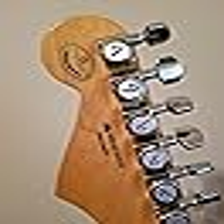



Rank 2: Image ID 643, Composite Similarity Score 0.4121826709304789
Review: These locking tuners look great and keep tune.  Good quality materials and construction.  Excellent upgrade to any guitar.  I had to drill additions holes for installation.  If your neck already comes with pre-drilled holes, then they should drop right in, otherwise you will need to buy a guitar tuner pin drill jig, also available from Amazon.
Images:


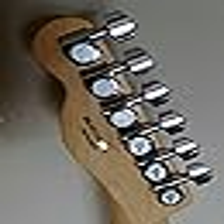



Rank 3: Image ID 2998, Composite Similarity Score 0.3941761023313918
Review: These go wonderfully with my Zakk Wylde Les Paul Custom Plus Grail. Been using Dunlop Straploks for years. They definitely take a beating. Granted I am not doing around the worlds and jumping around stage like a coke head, that behavior will destroy nearly any product, especially with wood and small screws. However, they definitely withstand some metal stage presence. Had some issues with seating but hats user error. Push the button and ensure it is fully seated and protect your guitar and investment. Easy day.
Images:


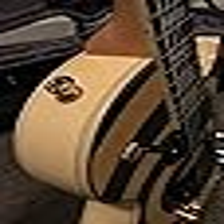

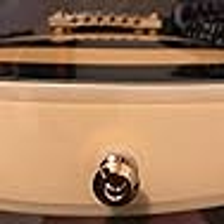



Rank 4: Image ID 244, Composite Similarity Score 0.38478545774838524
Review: I have 3 daughters and last year I bought my oldest a guitar.  She's been kind of luke warm ever since getting one but my middle daughter has been asking for one for a while now, so this was her birthday gift.  It's what you'd expect it to be....it's a Fender, but it's a Squier...so it's going to be mass produced "alright" quality for the most part, but not stellar by any means.  Nevertheless, it gets the job done (getting someone young interested in the learning process).  Be prepared to tighten down the various screws and nuts on the guitar when it arrives (this is why I docked them one star).  Personally I dislike strats, but this seemed like the best option to get my kids started on guitar.
Images:


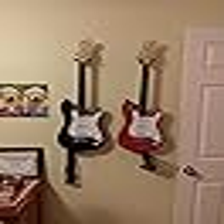

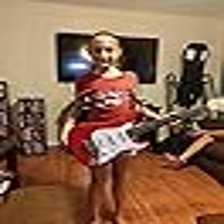



Rank 5: Image ID 647, Composite Similarity Score 0.3268924117582311
Review: Easy as heck to put on, In my opinion better than sperzel. These took literally 10 minutes to put on my  MIM strat.
Only thing ill say is you will probably need a setup after as removing these tuners, you can remove any string guides or trees from your headstock and that is  going to change the angle of your bridge a little bit. So be aware.
Images:


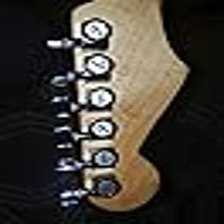



Rank 6: Image ID 170, Composite Similarity Score 0.3239348232746124
Review: Had to drill into my headstock. Needs 2 holes per tree because of the mounting peg. Use a ruler and a 1/16 drillbit and you'll be fine. I recommend installing with the strings on so you can set them properly.
Images:


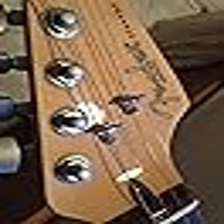



Rank 7: Image ID 2939, Composite Similarity Score 0.28999316692352295
Review: Great Quality, adjustable tension. Well made.
Images:


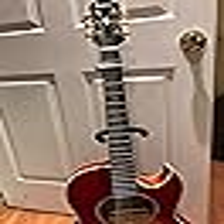

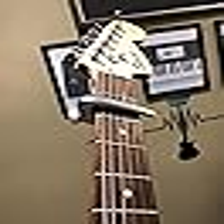



Rank 8: Image ID 644, Composite Similarity Score 0.2778860670675326
Review: I went from fender chrome non-locking to fender gold locking. It made my guitar look beautiful and play beautiful. I think locking tuners are the way to go. If you are new to locking tuners look on YouTube for instructions.
Images:


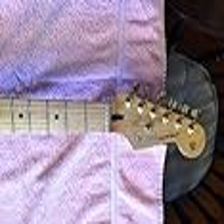



Rank 9: Image ID 100, Composite Similarity Score 0.2727978933829225
Review: aloha from hawaii!  it's 2015 and after 58 years, my '57 Fender P-Bass has a new case! the Fender P-Bass fits like a charm!
Images:


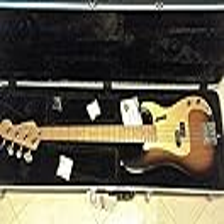

In [ ]:
# Dictionary to store composite similarity scores
composite_scores = {}

# Combine similarity scores for each pair of images and text
for image_id, image_similarity in top_similarities_list:
    for text_id, text_similarity in momo_reverse_sorted:
        if image_id == text_id:
            composite_scores[image_id] = (image_similarity + text_similarity) / 2
            break

for text_id, text_similarity in lolo:
    for image_id, image_similarity in top_3_similar_products:
        if image_id == text_id:
            composite_scores[image_id] = (image_similarity + text_similarity) / 2
            break

ranked_pairs = sorted(composite_scores.items(), key=lambda x: x[1], reverse=True)

for rank, (image_id, composite_score) in enumerate(ranked_pairs, start=1):
    images, review = retrieve.get(image_id, ([], ""))
    print(f"Rank {rank}: Image ID {image_id}, Composite Similarity Score {composite_score}")
    print("Review:", review)
    print("Images:")
    for image in images:
        display(image)
    print("\n")
